In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#prep
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MaxAbsScaler, QuantileTransformer

#models
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Ridge, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#validation libraries
#from sklearn.cross_validation import KFold, StratifiedKFold
from IPython.display import display
from sklearn import metrics


In [76]:
df_train = pd.read_csv('train.csv')
#df_test =  pd.read_csv('test.csv')

In [77]:
#frames = [df_train,df_test ]
#result = pd.concat(frames, sort = True)

In [78]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [79]:
df_train.shape

(1460, 81)

In [80]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [81]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [82]:
len(df_train.columns)

81

In [83]:
for x,y in zip (df_train.dtypes.index, df_train.dtypes):
    print(" {} ||  {} " .format(x,y))

 Id ||  int64 
 MSSubClass ||  int64 
 MSZoning ||  object 
 LotFrontage ||  float64 
 LotArea ||  int64 
 Street ||  object 
 Alley ||  object 
 LotShape ||  object 
 LandContour ||  object 
 Utilities ||  object 
 LotConfig ||  object 
 LandSlope ||  object 
 Neighborhood ||  object 
 Condition1 ||  object 
 Condition2 ||  object 
 BldgType ||  object 
 HouseStyle ||  object 
 OverallQual ||  int64 
 OverallCond ||  int64 
 YearBuilt ||  int64 
 YearRemodAdd ||  int64 
 RoofStyle ||  object 
 RoofMatl ||  object 
 Exterior1st ||  object 
 Exterior2nd ||  object 
 MasVnrType ||  object 
 MasVnrArea ||  float64 
 ExterQual ||  object 
 ExterCond ||  object 
 Foundation ||  object 
 BsmtQual ||  object 
 BsmtCond ||  object 
 BsmtExposure ||  object 
 BsmtFinType1 ||  object 
 BsmtFinSF1 ||  int64 
 BsmtFinType2 ||  object 
 BsmtFinSF2 ||  int64 
 BsmtUnfSF ||  int64 
 TotalBsmtSF ||  int64 
 Heating ||  object 
 HeatingQC ||  object 
 CentralAir ||  object 
 Electrical ||  object 
 1st

In [84]:
df_train.isna().sum().sort_values(ascending=False) / len(df_train) * 100

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageCond        5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Utilities         0.000000
YearRemodAdd      0.000000
MSSubClass        0.000000
Foundation        0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
Exterior1st       0.000000
RoofMatl          0.000000
RoofStyle         0.000000
YearBuilt         0.000000
                   ...    
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
3SsnPorch         0.000000
BsmtUnfSF         0.000000
S

In [118]:
null_columns.shape

(19,)

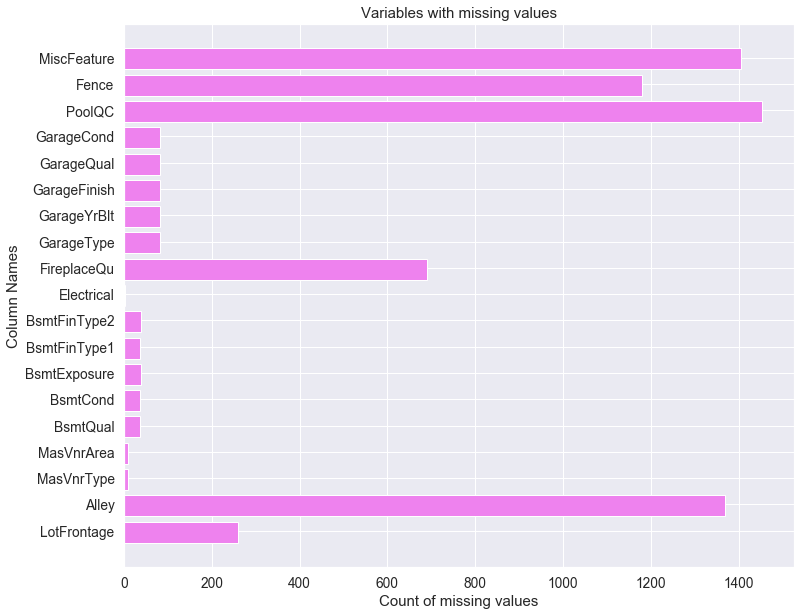

In [115]:
null_columns=df_train.columns[df_train.isnull().any()]
df_train[null_columns].isnull().sum()

labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(df_train[col].isnull().sum())
ind = np.arange(len(labels))
width = 0.1
fig, ax = plt.subplots(figsize=(12,10))
rects = ax.barh(ind, np.array(values), color='violet')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");


In [85]:
#df_train#.isna().sum().sort_values(ascending=False) / len(df_train) * 100

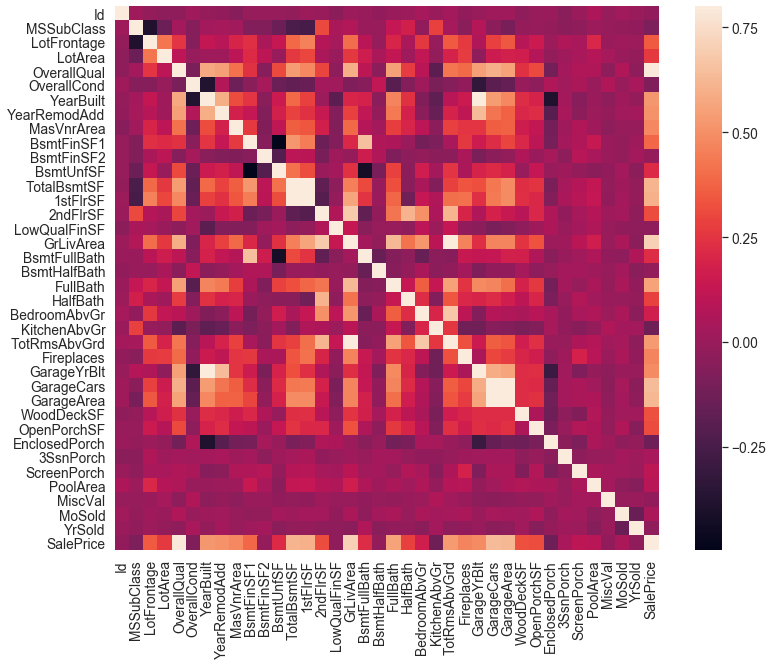

In [86]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(corrmat, vmax=.8, square=True);


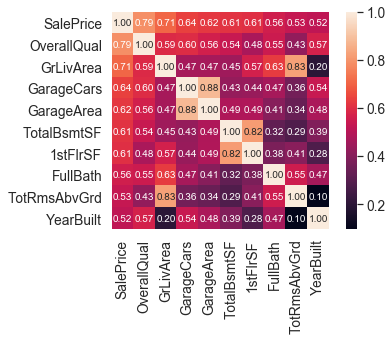

In [87]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

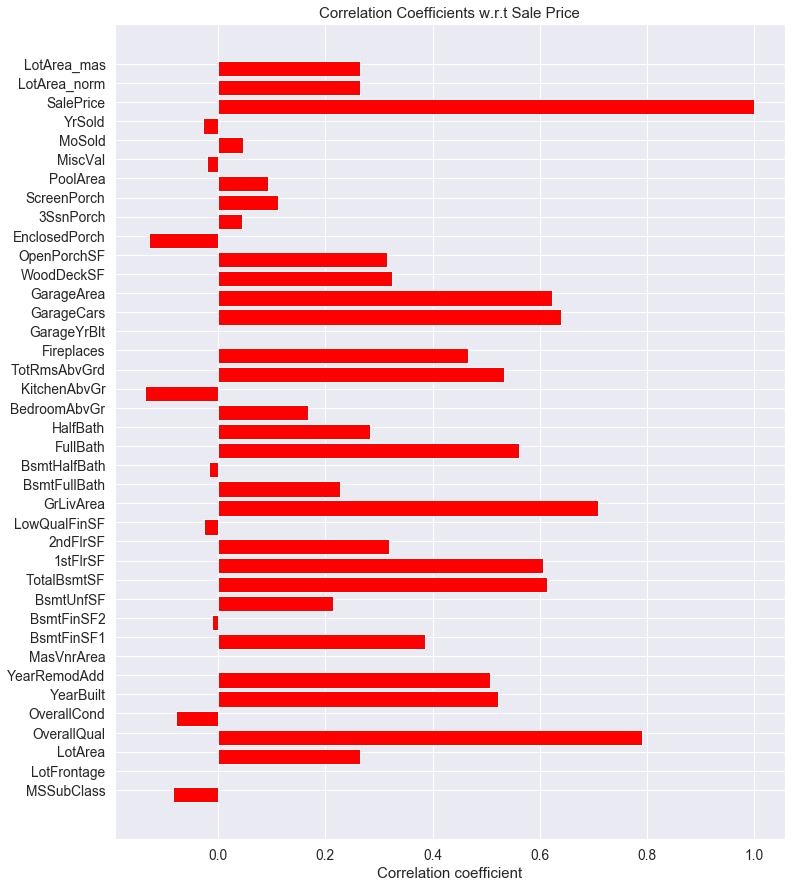

In [117]:
 #plotting correlations
num_feat=df_train.columns[df_train.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(df_train[col].values, df_train.SalePrice.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.5
fig, ax = plt.subplots(figsize=(12,15))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price");

In [94]:
correlations=df_train.corr()
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

/Users/shradhitsubudhi/anaconda3/envs/python37charm/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,Attribute Pair,Correlation
27,"(LotArea, LotArea_norm)",1.000000
29,"(LotArea_mas, LotArea_norm)",1.000000
24,"(GarageArea, GarageCars)",0.882475
30,"(GarageYrBlt, YearBuilt)",0.825667
0,"(GrLivArea, TotRmsAbvGrd)",0.825489
25,"(1stFlrSF, TotalBsmtSF)",0.819530
4,"(OverallQual, SalePrice)",0.790982
19,"(GrLivArea, SalePrice)",0.708624
22,"(2ndFlrSF, GrLivArea)",0.687501
5,"(BedroomAbvGr, TotRmsAbvGrd)",0.676620


In [89]:
df_train['LotArea_norm'] = df_train['LotArea']

ss = StandardScaler()
mas = MaxAbsScaler()
qs = QuantileTransformer()

df_train['LotArea_norm'] = ss.fit_transform(df_train[['LotArea']])
df_train['LotArea_mas'] = mas.fit_transform(df_train[['LotArea']])
df_train['LotArea_qs'] = qs.fit_transform(df_train[['LotArea']])


df_train[['LotArea_norm','LotArea_mas','LotArea_qs', 'LotArea']].head(5)

,LotArea_norm,LotArea_mas,LotArea_qs,LotArea
0,-0.207142,0.039258,0.349349,8450
1,-0.091886,0.044600,0.525025,9600
2,0.073480,0.052266,0.720220,11250
3,-0.096897,0.044368,0.509667,9550
4,0.375148,0.066250,0.897123,14260


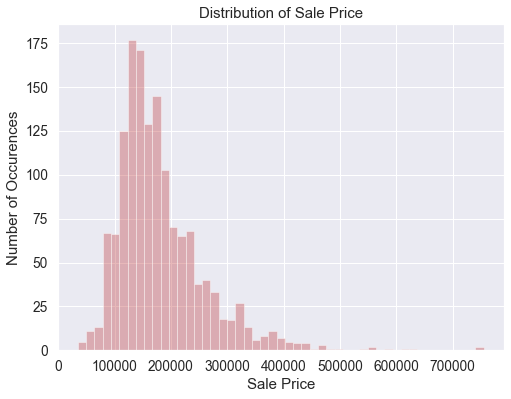

In [104]:
plt.figure(figsize=(8, 6))
sns.distplot(df_train['SalePrice'], color="r", kde=False, )
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")

plt.xlabel("Sale Price");

In [100]:
sns.distplot?

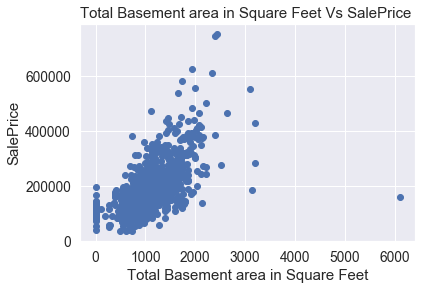

In [119]:
plt.scatter(df_train["TotalBsmtSF"],df_train["SalePrice"])
plt.title("Total Basement area in Square Feet Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement area in Square Feet");

In [129]:
#sns.factorplot("Fireplaces","SalePrice",data=df_train);


/Users/shradhitsubudhi/anaconda3/envs/python37charm/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shradhitsubudhi/anaconda3/envs/python37charm/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


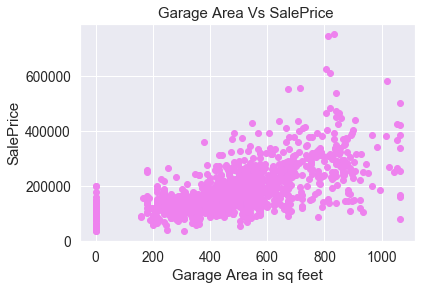

In [131]:
#GarageArea has got some outliers lets remove them.
upperlimit = np.percentile(df_train.GarageArea.values, 99.5)
df_train['GarageArea'].ix[df_train['GarageArea']>upperlimit] = upperlimit

plt.scatter(df_train.GarageArea, df_train["SalePrice"].values,color='violet')
plt.title("Garage Area Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Garage Area in sq feet");

In [133]:
upperlimit = np.percentile(df_train.GarageArea.values, 99.5)
#upperlimit

1060.9523999999983

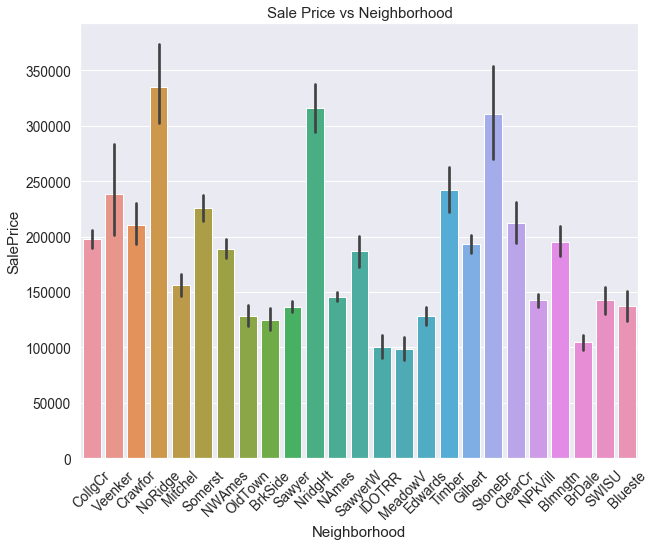

In [153]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=45) 
sns.barplot(df_train["Neighborhood"],df_train["SalePrice"])
plt.title("Sale Price vs Neighborhood");

In [144]:
#df_train['GarageArea'].ix[df_train['GarageArea']>upperlimit]